In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Define states, starting states, terminal states
alpha = 0.1
num_states = 7
terminal1 = 0
terminal2 = 6
start = 3
discound = 1
num_episodes = 100
num_runs = 100

# Actual V values
actual = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 0]

In [3]:
# Take step and return new state and associated reward
def step(state, action):
    if action == 0:
        news = state - 1
    elif action == 1:
        news = state + 1
    if state == 5 and action == 1:
        return 6, 1
    return news, 0

In [11]:
# Perform Temporal difference
def TD(alpha):
    v = 0.5
    V = np.full(num_states, v)
    V[0] = 0
    V[6] = 0
    res = []
    res.append(V.copy())
    error = np.zeros(num_episodes)
    for i in range(num_episodes):
        state = start
        while(state != terminal1 and state != terminal2):
            # Epsilon greedy action selection 
            val = random.uniform(0, 1)
            if val > 0.5:
                action = 0 # Left
            else:
                action = 1 # Right
            # Get next state and reward
            next_state, reward = step(state, action)
            # Update V
            V[state] += alpha * (reward + discound * V[next_state] - V[state])
            state = next_state
        # Find error wrt actual V values
        error[i] = np.sqrt(np.mean(np.power(actual - V, 2)))
        if i == 0 or i == 9 or i == 99:
            res.append(V.copy())
    return res, error

Text(0,0.5,'Estimated Value')

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.22727273  0.          0.04545455]
 [ 0.          1.23424851 -0.07399497]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     44.075]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


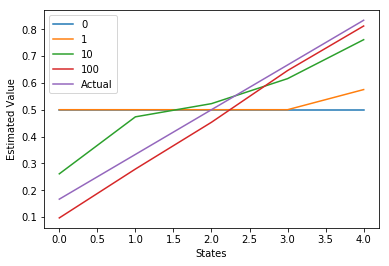

In [14]:
res, error = TD(alpha)
arr = ["0", "1", "10", "100"]
plt.figure()
for i in range(len(res)):
    plt.plot(res[i][1:-1], label=arr[i])
plt.plot(actual[1:-1], label="Actual")
plt.legend()
plt.xlabel("States")
plt.ylabel("Estimated Value")

In [6]:
# Perform Monte Carlo
def montecarlo(alpha):
    v = 0.5
    V = np.full(num_states, v)
    V[0] = 0
    V[6] = 0
    error = np.zeros(num_episodes)
    
    for i in range(num_episodes):
        store = []
        state = start
        cnt = 0
        while(state != terminal1 and state != terminal2):
            val = random.uniform(0, 1)
            if val > 0.5:
                action = 0 # Left
            else:
                action = 1 # Right
            # Get next state and reward
            next_state, reward = step(state, action)
            # Store info
            store.append((state, reward))
            state = next_state
            cnt += 1
        
        # Episode complete, now perform update
        gt = 0
        # Iterate in reverse
        for rev in range(cnt - 1, 0, -1):
            gt += store[rev][1]
            # Update V value
            V[store[rev][0]] += alpha * (gt - V[store[rev][0]])
        
        # Calculate error wrt actual V values
        error[i] = np.sqrt(np.mean(np.power(actual - V, 2)))
        
    return error

Text(0,0.5,'RMSE error')

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00918274  0.          0.04545455]
 [ 0.          5.40886284 -0.10677995]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     56.825]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


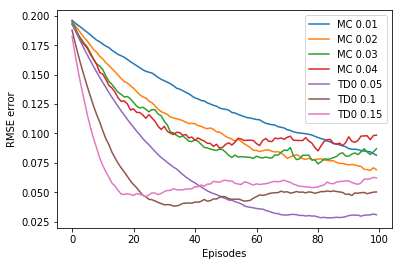

In [7]:
for alpha in [0.01, 0.02, 0.03, 0.04]:
    overall = np.zeros(num_episodes)
    for k in range(num_runs):
        error = montecarlo(alpha)
        overall += error
    overall = overall/num_runs
    plt.plot(overall, label="MC " + str(alpha))


for alpha in [0.05, 0.1, 0.15]:
    overall = np.zeros(num_episodes)
    for k in range(num_runs):
        res, error = TD(alpha)
        overall += error
    overall = overall/num_runs
    plt.plot(overall, label="TD0 " + str(alpha))

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("RMSE error")